In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
city = "city_data.csv"
ride = "ride_data.csv"
city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)

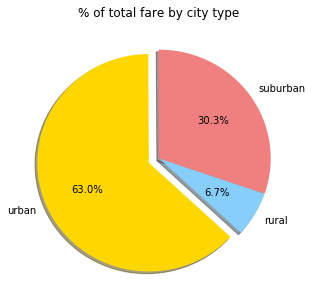

In [3]:
#merging the city sheet with the ride sheet, joining on city's index
merged = pd.DataFrame(city_df.merge(ride_df, how = "left"))

#changes the size of the plot to your liking
plt.figure(figsize = (5,5))

#grouping the merged df to be grouped up by names of the city, in alphabetical order
group_merge = merged.groupby(["city"])


total_fares = merged.groupby(["type"]).sum()["fare"]
labels = ["rural", "suburban", "urban"]
explode = [0,0,0.1]
plt.title("% of total fare by city type")
plt.pie(total_fares, colors = ["lightskyblue", "lightcoral", "gold"],labels = labels, 
        explode = explode, autopct="%.1f%%", shadow = True, startangle = 317)
plt.show()

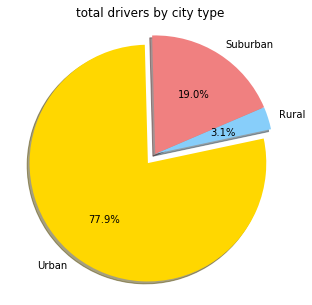

In [4]:

total_rides = city_df.groupby(["type"]).sum()["driver_count"]
labels2 = ["Rural", "Suburban","Urban"]
explode2 = [0,0,0.1]
plt.figure(figsize = (5,5))
plt.pie(total_rides, colors = ["lightskyblue", "lightcoral", "gold"],labels = labels2,
        explode = explode2, autopct="%.1f%%", shadow = True, startangle = 12)
plt.title("total drivers by city type")
plt.axis("equal")


plt.show()

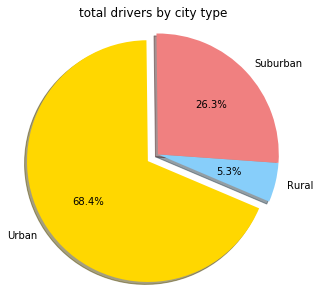

In [5]:
total_drivers = merged.groupby(["type"]).count()["ride_id"]
plt.figure(figsize = (5,5))
plt.pie(total_drivers, colors = ["lightskyblue", "lightcoral", "gold"],labels = labels2,
        explode = explode2, autopct="%.1f%%", shadow = True, startangle = 337)
plt.axis("equal")
plt.title("total drivers by city type")
plt.show()

In [6]:
#using the merged data, separating the cells by city type.
urban = merged[merged["type"] =="Urban"]
rural = merged[merged["type"] =="Rural"]
suburban = merged[merged["type"] =="Suburban"]

#finding the average fare of each city by each city type
urban_avg_fare = urban.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural.groupby(["city"]).mean()["fare"]
sub_avg_fare = suburban.groupby(["city"]).mean()["fare"]
#finding the total rides of each city by each city type
urban_total_rides = urban["city"].value_counts()
rural_total_rides = rural["city"].value_counts()
sub_total_rides = suburban["city"].value_counts()

#finding the driver count of each city by each city type
urban_driver_count = urban["driver_count"]
rural_driver_count = rural["driver_count"]
sub_driver_count = suburban["driver_count"]



In [7]:
#creating dataframes of total city rides and city avg fare by city
urban_data = pd.DataFrame({"Avg Fare": urban_avg_fare,
                   "Total Rides": urban_total_rides})
rural_data = pd.DataFrame({"Avg Fare": rural_avg_fare,
                   "Total Rides": rural_total_rides})
sub_data = pd.DataFrame({"Avg Fare": sub_avg_fare,
                   "Total Rides": sub_total_rides})

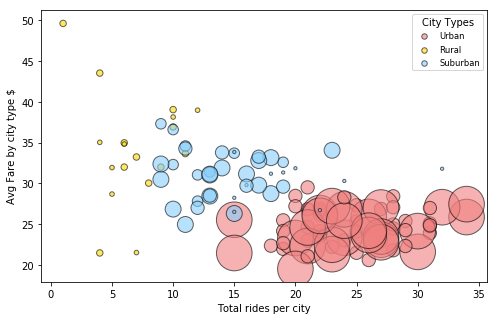

In [10]:
plt.figure(figsize = (8,5))
plt.scatter(urban_data[[1]], urban_data[[0]], color = "lightcoral", s = urban_driver_count **1.7, alpha = 0.6, edgecolors = "black", label = "Urban" )
plt.scatter(rural_data[[1]], rural_data[[0]], color = "gold",s =  rural_driver_count **1.7, alpha = 0.6, edgecolors = "black", label = "Rural")
plt.scatter(sub_data[[1]], sub_data[[0]], color = "lightskyblue", s = sub_driver_count **1.7, alpha = 0.6, edgecolors = "black", label = "Suburban")
# two instances of port james existed within the ride sheet, causing the total rides for port james to be 60+.
# it was removed.

plt.xlabel("Total rides per city")
plt.ylabel("Avg Fare by city type $")
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()